# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [214]:
#This notebook will use the linearlearner alogorithim to create a benchmark model for the udacity capstone project. This 
#notebook will take a subset of the provided data and classify those that triggered the reward as those that did not. A 
#triggered reward is defined as a reward value of >0 from the value dictionary. The features that will be used for this 
#classification are age, income, and gender.


#benchmark process is modified form the Fraud Detection Case Study

#import key resources
import io
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

%matplotlib inline

#First the notebook will read in the three json files

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [215]:
#id is used in two of the file and the id in the profile dataframe will be renamed as 'customer_id'
#reward is used is unpacked as part of the value dictionary and is 
profile.rename(columns={'id': 'customer_id'}, inplace=True)
portfolio.rename(columns={'reward': 'reward type'}, inplace=True)

In [4]:
#become_member_on may be useful in terms of time a member had the app, however the data set is a few years old and the data
#compared to today is most likely not useful. A more useful metric might be a count of how the user users the app, with data
#such as how oftern the app is opened, location data -ie how often was a member close to a Starbucks, and how often
#the member added money to the app, or actually did an action within the app

In [216]:
# a complete dataframe merging the three files is constructed
complete_df = pd.concat([portfolio, profile, transcript], axis = 1)

In [217]:
#dummy variables are need for only gender in this classification model and it is then concated to the original dataframe
gender_dummy = pd.get_dummies(complete_df['gender'])
event_dummy = pd.get_dummies(complete_df['event'])
offer_dummy = pd.get_dummies(complete_df['offer_type'])
complete_df = pd.concat([complete_df, gender_dummy, event_dummy, offer_dummy], axis = 1)

In [218]:
#we need to unpack the value dictionary into its different columns and the concat that into the original dataframe and drop the
#value column
from pandas.io.json import json_normalize
value_df = json_normalize(complete_df['value'])

In [35]:
#break out channels used for offers


In [11]:
complete_df.head()

,channels,difficulty,duration,id,offer_type,reward type,age,became_member_on,gender,customer_id,...,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational
0,"[email, mobile, social]",10.0,7.0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10.0,118.0,20170212.0,None,68be06ca386d4c31939f3a4f0e3dd783,...,0,0,0,0,1,0,0,1,0,0
1,"[web, email, mobile, social]",10.0,5.0,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10.0,55.0,20170715.0,F,0610b486422d4921ae7d2bf64640c50b,...,1,0,0,0,1,0,0,1,0,0
2,"[web, email, mobile]",0.0,4.0,3f207df678b143eea3cee63160fa8bed,informational,0.0,118.0,20180712.0,None,38fe809add3b4fcf9315a9694bb96ff5,...,0,0,0,0,1,0,0,0,0,1
3,"[web, email, mobile]",5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.0,75.0,20170509.0,F,78afa995795e4d85b5d9ceeca43f5fef,...,1,0,0,0,1,0,0,1,0,0
4,"[web, email]",20.0,10.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5.0,118.0,20170804.0,None,a03223e636434f42ac4c3df47e8bac43,...,0,0,0,0,1,0,0,0,1,0


In [219]:
#concat new dataframes into original
complete_df = pd.concat([complete_df, value_df], axis = 1)

In [220]:
#uneeded features are dropped 
complete_df = complete_df.drop(['person', 'id', 'gender', 'became_member_on', 'offer_type', 'event', 'customer_id', 
                               'channels', 'value'], axis = 1)

In [19]:
#inspect the dataframe head to ensure we have the correct columns
complete_df.head()

,difficulty,duration,reward type,age,income,time,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,amount,offer id,offer_id,reward
0,10.0,7.0,10.0,118.0,NaN,0,0,0,0,0,1,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,10.0,5.0,10.0,55.0,112000.0,0,1,0,0,0,1,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,0.0,4.0,0.0,118.0,NaN,0,0,0,0,0,1,0,0,0,0,1,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,5.0,7.0,5.0,75.0,100000.0,0,1,0,0,0,1,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,20.0,10.0,5.0,118.0,NaN,0,0,0,0,0,1,0,0,0,1,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [221]:
complete_df = complete_df.drop(['offer id', 'offer_id'], axis = 1)

In [222]:
complete_df['reward'] = complete_df['reward'].fillna(0)

In [223]:
complete_df['amount'] = complete_df['amount'].fillna(0)

In [224]:
complete_df['income'] = complete_df['income'].fillna(0)

In [24]:
complete_df.head()

,difficulty,duration,reward type,age,income,time,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,amount,reward
0,10.0,7.0,10.0,118.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0.0,0.0
1,10.0,5.0,10.0,55.0,112000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
2,0.0,4.0,0.0,118.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0.0,0.0
3,5.0,7.0,5.0,75.0,100000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
4,20.0,10.0,5.0,118.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.0


In [225]:
# delete all rows with column 'Age' is 118 and 'income' is 0
indexNames = complete_df[ (complete_df['age'] == 118) & (complete_df['income'] == 0) ].index
complete_df.drop(indexNames , inplace=True)

In [99]:
complete_df

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c-17,c-18
reward,,,,,,,,,,,,,,,,,,
0.0,10.0,5.0,10.0,55.0,112000.0,0,1,0,0,0,1,0,0,1,0,0,0.00,0.0
0.0,5.0,7.0,5.0,75.0,100000.0,0,1,0,0,0,1,0,0,1,0,0,0.00,0.0
0.0,7.0,7.0,3.0,68.0,70000.0,0,0,1,0,0,1,0,0,0,1,0,0.00,0.0
0.0,5.0,5.0,5.0,65.0,53000.0,0,0,1,0,0,1,0,0,1,0,0,0.00,0.0
0.0,0.0,0.0,0.0,58.0,51000.0,0,0,1,0,0,1,0,0,0,0,0,0.00,0.0
0.0,0.0,0.0,0.0,61.0,57000.0,0,1,0,0,0,1,0,0,0,0,0,0.00,0.0
0.0,0.0,0.0,0.0,26.0,46000.0,0,0,1,0,0,1,0,0,0,0,0,0.00,0.0
0.0,0.0,0.0,0.0,62.0,71000.0,0,1,0,0,0,1,0,0,0,0,0,0.00,0.0
0.0,0.0,0.0,0.0,49.0,52000.0,0,0,1,0,0,1,0,0,0,0,0,0.00,0.0


In [226]:
complete_df['difficulty'] = complete_df['difficulty'].fillna(0)
complete_df['duration'] = complete_df['duration'].fillna(0)
complete_df['reward type'] = complete_df['reward type'].fillna(0)

In [28]:
complete_df.head()

,difficulty,duration,reward type,age,income,time,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,amount,reward
1,10.0,5.0,10.0,55.0,112000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
3,5.0,7.0,5.0,75.0,100000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
5,7.0,7.0,3.0,68.0,70000.0,0,0,1,0,0,1,0,0,0,1,0,0.0,0.0
8,5.0,5.0,5.0,65.0,53000.0,0,0,1,0,0,1,0,0,1,0,0,0.0,0.0
12,0.0,0.0,0.0,58.0,51000.0,0,0,1,0,0,1,0,0,0,0,0,0.0,0.0


In [227]:
complete_df = complete_df.dropna()

In [30]:
complete_df['offer received'].value_counts()

1    11043
0     3782
Name: offer received, dtype: int64

In [31]:
reward_income_df = complete_df.groupby('reward')['income'].mean().to_frame()

In [32]:
reward_income_df

,income
reward,
0.0,65409.426032
2.0,69487.804878
3.0,63716.981132
5.0,63010.000000
10.0,64493.506494


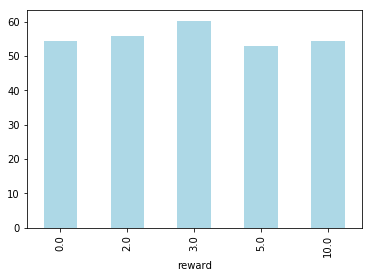

In [33]:
 complete_df.groupby('reward')['age'].mean().plot(kind = 'bar', color = 'lightblue')

In [34]:
complete_df['age'].mean()

54.39352445193929

In [98]:
complete_df.groupby('reward')['amount'].mean().plot(kind='bar',color='lightblue')

KeyError: 'Column not found: amount'

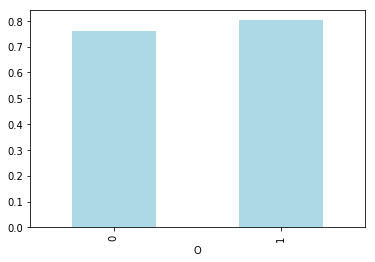

In [36]:
complete_df.groupby('O')['amount'].mean().plot(kind='bar',color='lightblue')

In [37]:
complete_df['amount'].mean()

0.7609558178752107

In [154]:
#need to normalize dataframe for 1st of three PCA analyses
#1 - who views the offer
#2 - who complete the offer
#3 - who 

In [38]:
#first we will reindex based on
complete_df.index=complete_df['reward'] 

In [39]:
complete_df.head()

,difficulty,duration,reward type,age,income,time,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,amount,reward
reward,,,,,,,,,,,,,,,,,,
0.0,10.0,5.0,10.0,55.0,112000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
0.0,5.0,7.0,5.0,75.0,100000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
0.0,7.0,7.0,3.0,68.0,70000.0,0,0,1,0,0,1,0,0,0,1,0,0.0,0.0
0.0,5.0,5.0,5.0,65.0,53000.0,0,0,1,0,0,1,0,0,1,0,0,0.0,0.0
0.0,0.0,0.0,0.0,58.0,51000.0,0,0,1,0,0,1,0,0,0,0,0,0.0,0.0


In [40]:
#now we need to normalize the data from 0-1

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
# store them in this dataframe
complete_df_scaled=pd.DataFrame(scaler.fit_transform(complete_df.astype(float)))

# get same features and State-County indices
complete_df_scaled.columns=complete_df.columns
complete_df_scaled.index=complete_df.index

complete_df_scaled.head()

,difficulty,duration,reward type,age,income,time,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,amount,reward
reward,,,,,,,,,,,,,,,,,,
0.0,1.0,0.714286,1.0,0.445783,0.911111,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.0,0.5,1.000000,0.5,0.686747,0.777778,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.0,0.7,1.000000,0.3,0.602410,0.444444,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0.0,0.5,0.714286,0.5,0.566265,0.255556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.0,0.0,0.000000,0.0,0.481928,0.233333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#start sagemaker PCA process
import sagemaker
import boto3
from sagemaker import get_execution_role

session = sagemaker.Session() # store the current SageMaker session

# get IAM role
role = get_execution_role()
print(role)

arn:aws:iam::078540992053:role/service-role/AmazonSageMaker-ExecutionRole-20191219T082471


In [66]:
# get default bucket
bucket_name = session.default_bucket()
print(bucket_name)
print()

sagemaker-us-east-1-078540992053



In [68]:
# define location to store model artifacts
prefix = 'PCA-K Means'

output_path='s3://{}/{}/'.format(bucket_name, prefix)

print('Training artifacts will be uploaded to: {}'.format(output_path))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-078540992053/PCA-K Means/


In [69]:
# define a PCA model
from sagemaker import PCA

# this is current features - 1
# you'll select only a portion of these to use, later
N_COMPONENTS=17

pca_SM = PCA(role=role,
             train_instance_count=1,
             train_instance_type='ml.c4.xlarge',
             output_path=output_path, # specified, above
             num_components=N_COMPONENTS, 
             sagemaker_session=session)


In [70]:
# convert df to np array
train_data_np = complete_df_scaled.values.astype('float32')

# convert to RecordSet format
formatted_train_data = pca_SM.record_set(train_data_np)

In [73]:
%%time

# train the PCA mode on the formatted data
pca_SM.fit(formatted_train_data)

2020-01-22 02:47:25 Starting - Starting the training job...
2020-01-22 02:47:27 Starting - Launching requested ML instances......
2020-01-22 02:48:30 Starting - Preparing the instances for training......
2020-01-22 02:49:52 Downloading - Downloading input data...
2020-01-22 02:50:23 Training - Training image download completed. Training in progress.
2020-01-22 02:50:23 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
[01/22/2020 02:50:21 INFO 139905571288896] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_num_gpus': u'auto', u'_log_level': u'info', u'subtract_mean': u'true', u'force_dense': u'true', u'epochs': 1, u'algorithm_mode': u'regular', u'extra_components': u'-1', u'_kvstore': u'dist_sync', u'_num_kv_servers': u'auto'}
[01/22/2020 02:50:21 INFO 139905571288896] Reading provided configuration from /opt/ml/input/config/hyperparameters.json: {u'feature_dim': u'18', u

[01/22/2020 02:50:23 INFO 139905571288896] nvidia-smi took: 0.0252552032471 secs to identify 0 gpus
[01/22/2020 02:50:23 INFO 139905571288896] Number of GPUs being used: 0
[01/22/2020 02:50:23 INFO 139905571288896] The default executor is <PCAExecutor on cpu(0)>.
[01/22/2020 02:50:23 INFO 139905571288896] 18 feature(s) found in 'data'.
[01/22/2020 02:50:23 INFO 139905571288896] <PCAExecutor on cpu(0)> is assigned to batch slice from 0 to 499.
#metrics {"Metrics": {"initialize.time": {"count": 1, "max": 745.4428672790527, "sum": 745.4428672790527, "min": 745.4428672790527}}, "EndTime": 1579661423.069306, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "PCA"}, "StartTime": 1579661422.315585}

#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total

In [74]:
# Get the name of the training job, it's suggested that you copy-paste
# from the notebook or from a specific job in the AWS console
training_job_name='pca-2020-01-22-02-47-25-525'

# where the model is saved, by default
model_key = os.path.join(prefix, training_job_name, 'output/model.tar.gz')
print(model_key)

# download and unzip model
boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')

# unzipping as model_algo-1
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo-1')

PCA-K Means/pca-2020-01-22-02-47-25-525/output/model.tar.gz


2304

In [75]:
# features
features_list = complete_df_scaled.columns.values
print('Features: \n', features_list)

Features: 
 ['difficulty' 'duration' 'reward type' 'age' 'income' 'time' 'F' 'M' 'O'
 'offer completed' 'offer received' 'offer viewed' 'transaction' 'bogo'
 'discount' 'informational' 'amount' 'reward']


In [76]:
import mxnet as mx

# loading the unzipped artifacts
pca_model_params = mx.ndarray.load('model_algo-1')

# what are the params
print(pca_model_params)

{'s': 
[           nan 1.72234708e-04 1.09132174e-02 1.09385595e-01
 5.25367200e-01 1.23154092e+00 1.81883895e+00 2.96477175e+00
 4.87274313e+00 1.76945267e+01 2.14936275e+01 2.24093342e+01
 2.68431320e+01 3.05509815e+01 3.73878517e+01 6.88603058e+01
 8.48107376e+01]
<NDArray 17 @cpu(0)>, 'v': 
[[-3.3269450e-16  6.8031740e-01  4.6998004e-05 -1.4874802e-02
   5.4794443e-01  1.5447058e-01  8.2574770e-05 -4.6120602e-01
   1.2548607e-04 -1.2685051e-04  3.5188466e-05 -2.2410227e-04
   6.0137903e-05 -7.3086709e-04  4.1693631e-05  1.7978525e-04
  -8.7095788e-05]
 [-4.2988383e-21  2.0927837e-06 -3.5267317e-06  5.2810085e-01
  -5.4934031e-01  3.2196707e-01  5.2322637e-05 -5.6184608e-01
   1.4920776e-04 -1.6972487e-04  9.4303119e-05  6.8173293e-05
   7.2092749e-05 -8.8985480e-04  5.4943768e-05  2.3050584e-04
  -7.2303985e-05]
 [ 3.3269278e-16 -6.8031675e-01 -4.7911697e-05  2.2163649e-01
   5.4705036e-01 -1.4476046e-01  9.4929674e-05 -4.0950587e-01
   1.2293115e-04 -1.0781880e-04  1.3038494e-05 -

In [77]:
# get selected params
s=pd.DataFrame(pca_model_params['s'].asnumpy())
v=pd.DataFrame(pca_model_params['v'].asnumpy())

In [78]:
import seaborn as sns

def display_component(v, features_list, component_num, n_weights=10):
    
    # get index of component (last row - component_num)
    row_idx = N_COMPONENTS-component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()


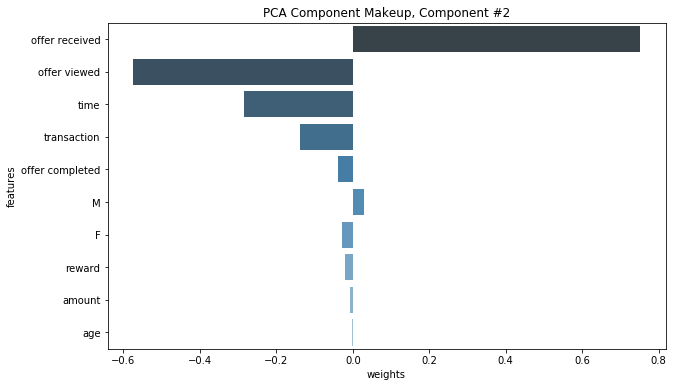

In [79]:
# display makeup of first component
num=2
display_component(v, complete_df_scaled.columns.values, component_num=num, n_weights=10)

In [80]:
%%time
# this takes a little while, around 7mins
pca_predictor = pca_SM.deploy(initial_instance_count=1, 
                              instance_type='ml.t2.medium')

---------------------------------------------------------------------------------------------------------------------------!CPU times: user 641 ms, sys: 39.6 ms, total: 681 ms
Wall time: 10min 23s


In [81]:
# pass np train data to the PCA model
train_pca = pca_predictor.predict(train_data_np)

In [82]:
# check out the first item in the produced training features
data_idx = 0
print(train_pca[data_idx])

label {
  key: "projection"
  value {
    float32_tensor {
      values: -1.1249656330721176e-22
      values: 2.1187588572502136e-08
      values: -1.1920928955078125e-07
      values: 0.016339972615242004
      values: 0.38833218812942505
      values: -0.3004414737224579
      values: 0.0002990206703543663
      values: -1.8066493272781372
      values: 0.0017964541912078857
      values: -0.011685609817504883
      values: -0.024074971675872803
      values: -0.27337726950645447
      values: 0.018803760409355164
      values: -0.3498995900154114
      values: 0.01664651930332184
      values: 0.29070350527763367
      values: -0.8751534223556519
    }
  }
}



In [85]:
# create dimensionality-reduced data
def create_transformed_df(train_pca, complete_df_scaled, n_top_components):
    ''' Return a dataframe of data points with component features. 
        The dataframe should be indexed by State-County and contain component values.
        :param train_pca: A list of pca training data, returned by a PCA model.
        :param counties_scaled: A dataframe of normalized, original features.
        :param n_top_components: An integer, the number of top components to use.
        :return: A dataframe, indexed by State-County, with n_top_component values as columns.        
     '''
    # create new dataframe to add data to
    complete_df_transformed=pd.DataFrame()

    # for each of our new, transformed data points
    # append the component values to the dataframe
    for data in train_pca:
        # get component values for each data point
        components=data.label['projection'].float32_tensor.values
        complete_df_transformed=complete_df_transformed.append([list(components)])

    # index by county, just like counties_scaled
    complete_df_transformed.index=complete_df_scaled.index

    # keep only the top n components
    start_idx = N_COMPONENTS - n_top_components
    complete_df_transformed = complete_df_transformed.iloc[:,start_idx:]
    
    # reverse columns, component order     
    return complete_df_transformed.iloc[:, ::-1]
    

In [100]:
# specify top n
top_n = 10

# call your function and create a new dataframe
complete_df_transformed = create_transformed_df(train_pca, complete_df_scaled, n_top_components=top_n)

# add descriptive columns
PCA_list=['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8','c_9', 'c_10', 'c_11', 'c_12',
         'c_13', 'c_14', 'c_15', 'c_16', 'c-17', 'c-18']
complete_df.columns=PCA_list 

# print result
complete_df_transformed.head()

,16,15,14,13,12,11,10,9,8,7
reward,,,,,,,,,,
0.0,-0.875153,0.290704,0.016647,-0.349900,0.018804,-0.273377,-0.024075,-0.011686,0.001796,-1.806649
0.0,-0.875798,0.289780,0.019020,-0.370879,0.012160,-0.000923,0.011012,-0.016623,0.001993,-1.531856
0.0,0.564316,0.347385,0.026364,-0.195777,0.015316,0.104043,0.025582,-0.014897,0.000152,-1.136095
0.0,0.583126,0.347464,0.027340,-0.019561,0.015455,0.176939,0.033836,-0.018583,0.000161,-1.372197
0.0,0.589939,0.347195,0.026816,0.047209,0.017309,0.119738,0.025892,-0.017890,-0.000356,0.000315


In [90]:
session.delete_endpoint(pca_predictor.endpoint)

ClientError: An error occurred (ValidationException) when calling the DeleteEndpoint operation: Could not find endpoint "arn:aws:sagemaker:us-east-1:078540992053:endpoint/pca-2020-01-22-02-47-25-525".

In [101]:
complete_df_transformed.groupby(['reward']).mean()

,16,15,14,13,12,11,10,9,8,7
reward,,,,,,,,,,
0.0,-0.001229,0.012851,0.009474,0.000395,-0.005026,-0.003518,0.024273,-0.000285,0.000604,1.306037e-07
2.0,0.030312,-0.607465,-0.444868,-0.058464,0.263505,0.126265,-0.992725,0.029620,-0.308729,2.065682e-06
3.0,0.006646,-0.615001,-0.454918,-0.032553,0.279748,0.210777,-1.022304,-0.001629,-0.218129,-2.646264e-05
5.0,-0.053651,-0.581267,-0.413485,0.029592,0.170364,0.153626,-1.139407,0.001043,-0.037930,-5.463313e-05
10.0,0.264509,-0.596979,-0.461871,-0.028247,0.252919,0.183936,-1.334439,0.021978,0.414357,6.236663e-05


In [97]:
features_list

array(['difficulty', 'duration', 'reward type', 'age', 'income', 'time',
       'F', 'M', 'O', 'offer completed', 'offer received', 'offer viewed',
       'transaction', 'bogo', 'discount', 'informational', 'amount',
       'reward'], dtype=object)

In [103]:
#using the top 7 components, we can develop a multi-classification model using the XGBOOST algorithmn


In [228]:
#we can use the same transformed dataframe from the PCA analysis or go back to the original dataframe and use that with only
#the top 7 features. These are"
#offer completed
#offer received
#offer viewed
#transaction
#bogo
#discount
#informaitonal


,difficulty,duration,reward type,age,income,time,F,M,O,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,amount,reward
1,10.0,5.0,10.0,55.0,112000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
3,5.0,7.0,5.0,75.0,100000.0,0,1,0,0,0,1,0,0,1,0,0,0.0,0.0
5,7.0,7.0,3.0,68.0,70000.0,0,0,1,0,0,1,0,0,0,1,0,0.0,0.0
8,5.0,5.0,5.0,65.0,53000.0,0,0,1,0,0,1,0,0,1,0,0,0.0,0.0
12,0.0,0.0,0.0,58.0,51000.0,0,0,1,0,0,1,0,0,0,0,0,0.0,0.0


In [292]:
#drop uneeded data
complete_df_mC = complete_df[['offer completed', 'offer received', 'offer viewed', 'transaction', 'bogo', 'discount', 
                              'informational', 'reward']]

In [293]:
#check dataframe
complete_df_mC

,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,reward
1,0,1,0,0,1,0,0,0.0
3,0,1,0,0,1,0,0,0.0
5,0,1,0,0,0,1,0,0.0
8,0,1,0,0,1,0,0,0.0
12,0,1,0,0,0,0,0,0.0
13,0,1,0,0,0,0,0,0.0
14,0,1,0,0,0,0,0,0.0
15,0,1,0,0,0,0,0,0.0
16,0,1,0,0,0,0,0,0.0
18,0,1,0,0,0,0,0,0.0


In [295]:
complete_df_mC['reward'].value_counts()


0.0     14513
5.0       100
2.0        82
10.0       77
3.0        53
Name: reward, dtype: int64

In [304]:
#organize classes into sequential integers (0 = 0, 1 = 2, 2 = 3, 3 = 5, 4 = 10)
complete_df_mC['reward'] = complete_df_mC['reward'].apply(lambda x: 4 if x==10 else 1 if x == 2 else 2 if x==3 else
                                                   3 if x == 5 else 0)
complete_df_mC['reward'].value_counts()

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0    14513
3      100
1       82
4       77
2       53
Name: reward, dtype: int64

In [352]:
#this modified a template from here: https://aws.amazon.com/blogs/machine-learning/build-multiclass-classifiers-with-amazon-sagemaker-linear-learner/

r_type = complete_df_mC.as_matrix().astype(np.float32)
r_type_features, r_labels = r_type[:, 7], r_type[:, :7]
# shuffle and split into train and test sets
np.random.seed(0)
train_features, test_features, train_labels, test_labels = train_test_split(
    r_type_features, r_labels, test_size=0.2)
# further split the test set into validation and test sets
val_features, test_features, val_labels, test_labels = train_test_split(
    test_features, test_labels, test_size=0.5)

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [353]:
test_labels.max()

1.0

In [306]:
import sagemaker
from sagemaker.amazon.amazon_estimator import RecordSet
import boto3

# instantiate the LinearLearner estimator object
multiclass_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=5)

In [318]:
#wrap data in RecordSet objects
train_records = multiclass_estimator.record_set(train_features, train_labels, channel='train')
val_records = multiclass_estimator.record_set(val_features, val_labels, channel='validation')
test_records = multiclass_estimator.record_set(test_features, test_labels, channel='test')

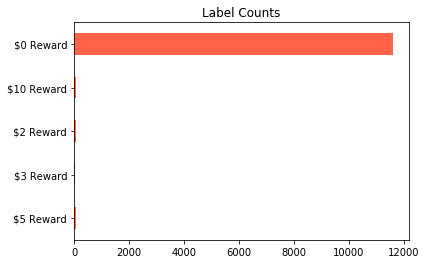

In [322]:
# assign label names and count label frequencies
label_map = {0:'$0 Reward', 1:'$2 Reward', 2:'$3 Reward', 3:'$5 Reward', 
             4:'$10 Reward'}
label_counts = pd.DataFrame(data=train_labels)[0].map(label_map).value_counts(sort=False).sort_index(ascending=False)
label_counts.plot('barh', color='tomato', title='Label Counts')

In [308]:
multiclass_estimator.fit([train_records, val_records, test_records])


2020-01-29 18:33:06 Starting - Starting the training job......
2020-01-29 18:33:37 Starting - Launching requested ML instances......
2020-01-29 18:34:48 Starting - Preparing the instances for training......
2020-01-29 18:35:54 Downloading - Downloading input data...
2020-01-29 18:36:32 Training - Downloading the training image...
2020-01-29 18:37:03 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
[01/29/2020 18:36:55 INFO 139893492320064] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_met


2020-01-29 18:37:10 Completed - Training job completed
Training seconds: 76
Billable seconds: 76


In [323]:
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Using already existing model: linear-learner-2020-01-29-18-33-06-589


--------------------------------------------------------------------------------------------------!

In [324]:
def evaluate_metrics(predictor, test_features, test_labels):
    """
    Evaluate a model on a test set using the given prediction endpoint. Display classification metrics.
    """
    # split the test dataset into 100 batches and evaluate using prediction endpoint
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]

    # parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    test_preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    test_preds = test_preds.reshape((-1,))
    
    # calculate accuracy
    accuracy = (test_preds == test_labels).sum() / test_labels.shape[0]
    
    # calculate recall for each class
    recall_per_class, classes = [], []
    for target_label in np.unique(test_labels):
        recall_numerator = np.logical_and(test_preds == target_label, test_labels == target_label).sum()
        recall_denominator = (test_labels == target_label).sum()
        recall_per_class.append(recall_numerator / recall_denominator)
        classes.append(label_map[target_label])
    recall = pd.DataFrame({'recall': recall_per_class, 'class_label': classes})
    recall.sort_values('class_label', ascending=False, inplace=True)

    # calculate confusion matrix
    label_mapper = np.vectorize(lambda x: label_map[x])
    confusion_matrix = pd.crosstab(label_mapper(test_labels), label_mapper(test_preds), 
                                   rownames=['Actuals'], colnames=['Predictions'], normalize='index')

    # display results
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')  
    ax = recall.plot(kind='barh', x='class_label', y='recall', color='steelblue', title='Recall', legend=False)
    ax.set_ylabel('')
    print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.985


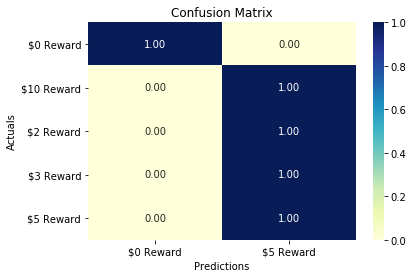

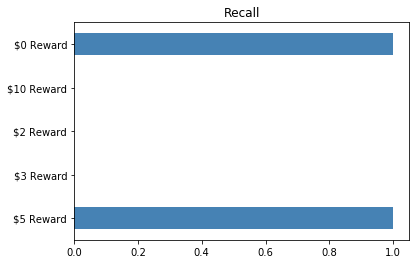

In [325]:
#evaluate metrics of the model trained with default hyperparameters
evaluate_metrics(multiclass_predictor, test_features, test_labels)


In [330]:
#next try witha class balance hyperparamete
balanced_multiclass_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                                        train_instance_count=1,
                                                        train_instance_type='ml.m4.xlarge',
                                                        predictor_type='multiclass_classifier',
                                                        num_classes=5,
                                                        balance_multiclass_weights=True)

In [331]:
balanced_multiclass_estimator.fit([train_records, val_records, test_records])


2020-01-29 21:58:49 Starting - Starting the training job...
2020-01-29 21:58:50 Starting - Launching requested ML instances.........
2020-01-29 22:00:24 Starting - Preparing the instances for training...
2020-01-29 22:01:18 Downloading - Downloading input data...
2020-01-29 22:01:37 Training - Downloading the training image..Docker entrypoint called with argument(s): train
[01/29/2020 22:02:02 INFO 139697286510400] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u'lr_scheduler_minimum_lr': u


2020-01-29 22:02:18 Uploading - Uploading generated training model
2020-01-29 22:02:18 Completed - Training job completed
Training seconds: 60
Billable seconds: 60


In [336]:
balanced_multiclass_predictor = balanced_multiclass_estimator.deploy(initial_instance_count=1, 
                                                                     instance_type='ml.m4.xlarge')

Using already existing model: linear-learner-2020-01-29-21-58-49-477


---------------------------------------------------------------------------------------------------------------!

Accuracy: 0.982


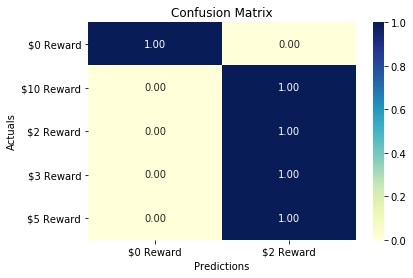

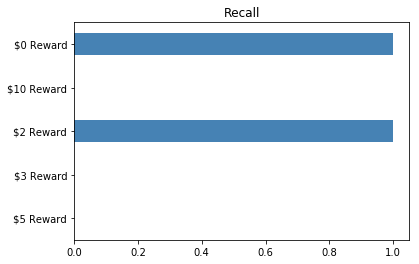

In [337]:
evaluate_metrics(balanced_multiclass_predictor, test_features, test_labels)

In [340]:
# ensure endpoints are deleted
#multiclass_predictor.delete_endpoint()
#balanced_multiclass_predictor.delete_endpoint()

In [345]:
#even when balancing the classes, that did not work that well
#next will try and xgboost with a softmax function for multiclass


In [346]:
# This is our local data directory. We need to make sure that it exists.
data_dir = '../data/SBMC'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [347]:
# We use pandas to save our test, train and validation data to csv files. Note that we make sure not to include header
# information or an index as this is required by the built in algorithms provided by Amazon. Also, for the train and
# validation data, it is assumed that the first entry in each row is the target variable.

X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([Y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [348]:
prefix = 'SB_MC'

test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

In [341]:
# As stated above, we use this utility method to construct the image name for the training container.
container = get_image_uri(session.boto_region_name, 'xgboost', '0.90-1')

# Now that we know which container to use, we can construct the estimator object.
xgb = sagemaker.estimator.Estimator(container, # The image name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.p2.xlarge', # The type of instance to use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

In [350]:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='multi:softmax',
                        num_class = 4,
                        early_stopping_rounds=10,
                        num_round=200)

In [351]:
# This is a wrapper around the location of our train and validation data, to make sure that SageMaker
# knows our data is in csv format.
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2020-01-30 03:59:37 Starting - Starting the training job...
2020-01-30 03:59:38 Starting - Launching requested ML instances......
2020-01-30 04:00:47 Starting - Preparing the instances for training......
2020-01-30 04:02:00 Downloading - Downloading input data...
2020-01-30 04:02:26 Training - Downloading the training image...
2020-01-30 04:03:03 Uploading - Uploading generated training model
2020-01-30 04:03:03 Failed - Training job failed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[04:02:52] 6654x7 matrix with 46578 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&deli

UnexpectedStatusException: Error for Training job sagemaker-xgboost-2020-01-30-03-59-37-431: Failed. Reason: AlgorithmError: framework error: 
Traceback (most recent call last):
  File "/miniconda3/lib/python3.7/site-packages/sagemaker_xgboost_container/algorithm_mode/train.py", line 192, in train_job
    verbose_eval=False)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "/miniconda3/lib/python3.7/site-packages/xgboost/core.py", line 1109, in update
    dtrain.handle))
  File "/miniconda3/lib/python3.7/site-packages/xgboost/core.py", line 176, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [04:02:53] /workspace/src/objective/multiclass_obj.cu:110: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) /miniconda3/xgboost/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f55885a4cb4]
  [bt] (1) /miniconda3/xg

In [ ]:
balanced_multiclassXGB_predictor = xgb.estimator.deploy(initial_instance_count=1, 
                                                                     instance_type='ml.m4.xlarge')

In [ ]:
evaluate_metrics(balanced_multiclassXGB_predictor, test_features, test_labels)